# Team Project 1 for Team#21

Business Case: Analyzing Factors Influencing Term Deposit Acquisition

Executive Summary

This business case explores the relationship between customer demographics, financial standing, and campaign strategy on the likelihood of acquiring a term deposit. By understanding these factors, our bank can refine marketing strategies, improve customer targeting, and ultimately increase term deposit sales.

Objectives

1. Identify key customer demographics that influence term deposit acquisition.
2. Assess the impact of financial standing on customer decisions. 
3. Evaluate the effectiveness of current campaign strategies. 
4. Develop actionable recommendations to enhance marketing efforts.

Background

Term deposits are a cornerstone of our savings products, providing a secure investment option for customers. However, recent trends indicate a need to better understand the factors influencing customer decisions in order to optimize our marketing strategies and increase conversions.

### Clustering and Resampling

To use Python for analyzing the provided dataset and answering the research questions, we follow these steps. The process involves data exploration, preprocessing, model building, and evaluation. Below is a general outline for using Python to approach these research questions:

##### Steps:
1. **Step1**: Import Necessary Libraries.
2. **Step2**: Load the dataset.
3. **Step3**: Data Exploration.
4. **Step4**: Data Preprocessing.
5. **Step5**: Split the data into Training and Testing Sets.
6. **Step6**: Train a Classification Model.
7. **Step7**: Evaluate the Model.
8. **Step8**: Feature Importance Analysis.
9. **Step9**: Answering Specific Research Questions.

#### **Step 1: Import Necessary Libraries** 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### **Step 2: Load the Dataset**

In [3]:
# Load the dataset
df = pd.read_csv('C:\\Tina Lin\\Training\\DSI\\Projects\\Datasets\\bank.csv')

#### **Step 3: Data Exploration**

Explore the data to understand its structure and identify any missing values or data quality issues.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  outcome    4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
               age       balance          day     duration     campaign  \
count  4521.000000 

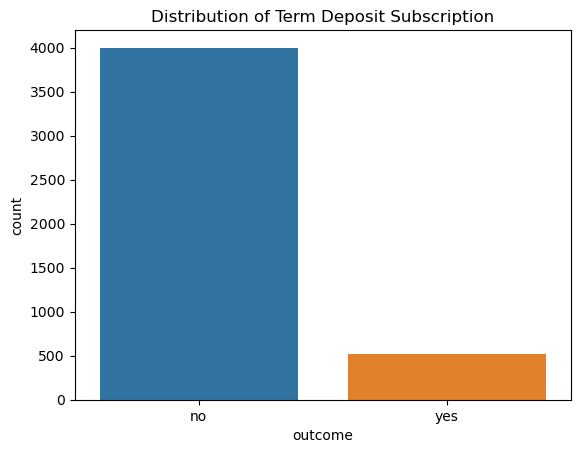

In [5]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drops any rows with at least one NA value
df = df.dropna()

# Drops columns that have any NA values
df = df.dropna(axis=1)

# Show the distribution of the target variable
sns.countplot(x='outcome', data=df)
plt.title('Distribution of Term Deposit Subscription')
plt.show()

#### **Step 4: Data Preprocessing**

1. Encode categorical variable.

2. Handle any missing values if present.

3. Standardize numerical features if needed.

In [27]:
# Encoding categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Encoding the target variable
label_encoder = LabelEncoder()
df_encoded['outcome'] = label_encoder.fit_transform(df_encoded['outcome'])

# Standardizing numerical features
scaler = StandardScaler()
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Checking the transformed data
print(df_encoded.head())

        age   balance       day  duration  campaign     pdays  previous  \
0 -1.056270  0.121072  0.374052 -0.711861 -0.576829 -0.407218 -0.320413   
1 -0.772583  1.118644 -0.596026 -0.169194 -0.576829  2.989044  2.041734   
2 -0.583458 -0.024144  0.010273 -0.303898 -0.576829  2.899143  0.270124   
3 -1.056270  0.017726 -1.566105 -0.250017  0.387967 -0.407218 -0.320413   
4  1.686036 -0.472753 -1.323585 -0.146102 -0.576829 -0.407218 -0.320413   

   outcome  job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  \
0        0                0                 0  ...          0          0   
1        0                0                 0  ...          0          0   
2        0                0                 0  ...          0          0   
3        0                0                 0  ...          0          1   
4        0                1                 0  ...          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          0    

#### **Step 5: Split the Data into Training and Testing Sets**

In [28]:
X = df_encoded.drop('outcome', axis=1)
y = df_encoded['outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### **Step 6: Train a Classification Model**

For predicting whether a client will subscribe to a term deposit, we can start with a Random Forest model.

In [29]:
# Training the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#### **Step 7: Evaluate the Model**

Evaluate the performance using metrics like accuracy, confusion matrix, and classification report.

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.58      0.21      0.31       152

    accuracy                           0.89      1357
   macro avg       0.74      0.60      0.63      1357
weighted avg       0.87      0.89      0.87      1357



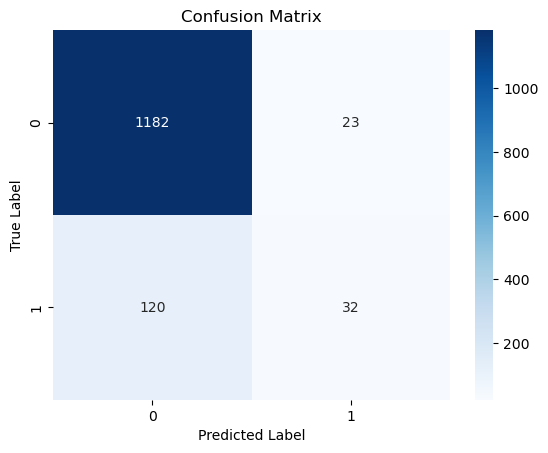

Model Accuracy: 0.89


In [30]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

#### **Step 8: Feature Importance Analysis**

To identify which features are the most important predictors of a successful term deposit subscription, we can analyze feature importance from the trained model.

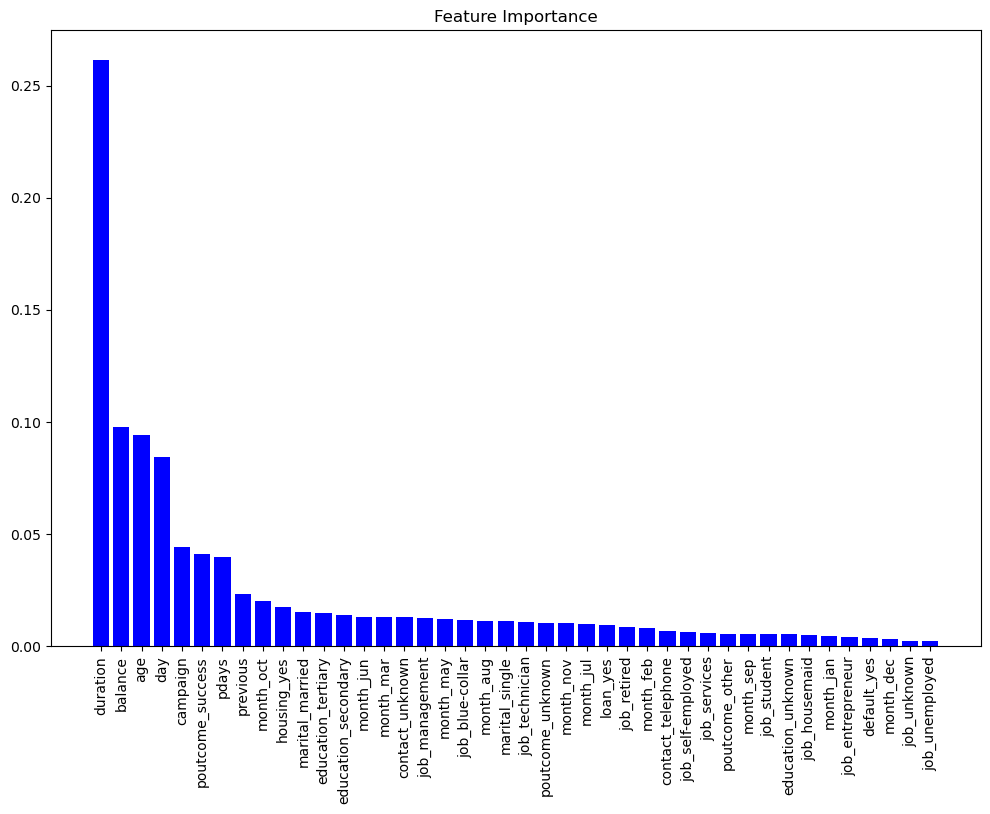

In [31]:
# Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

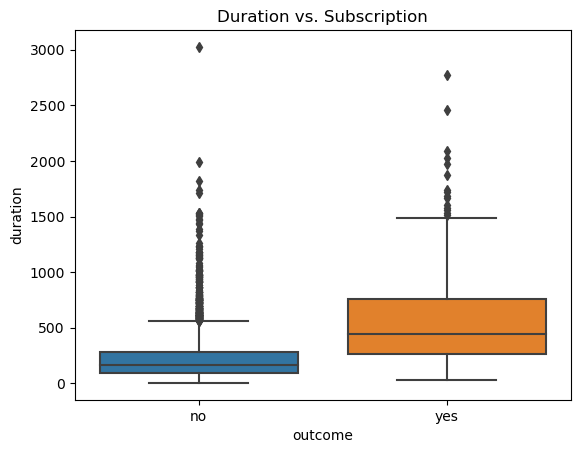

In [32]:
# Plotting the effect of duration on subscription
sns.boxplot(x='outcome', y='duration', data=df)
plt.title('Duration vs. Subscription')
plt.show()

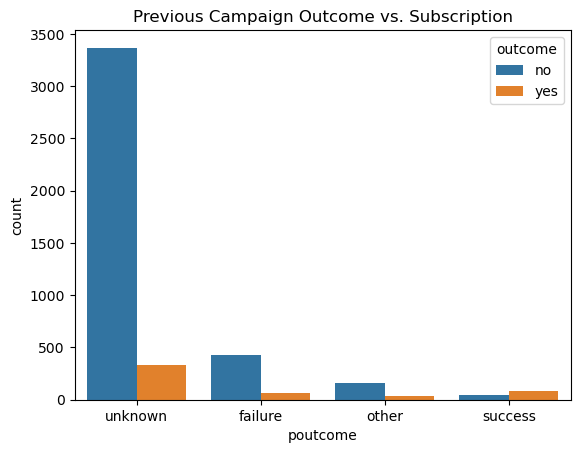

In [33]:
# Plotting the impact of previous campaign outcome
sns.countplot(x='poutcome', hue='outcome', data=df)
plt.title('Previous Campaign Outcome vs. Subscription')
plt.show()

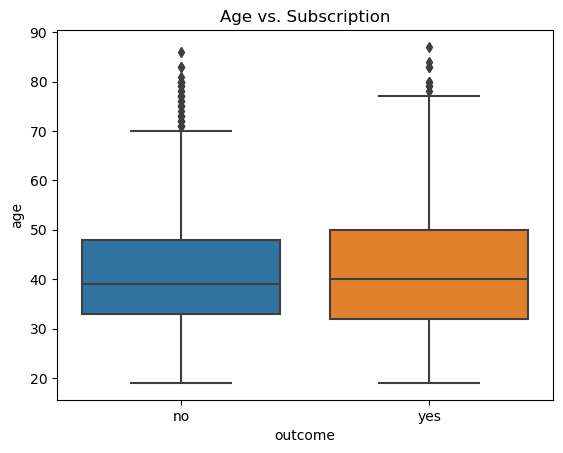

In [34]:
# Plotting the effect of Age on subscription
sns.boxplot(x='outcome', y='age', data=df)
plt.title('Age vs. Subscription')
plt.show()

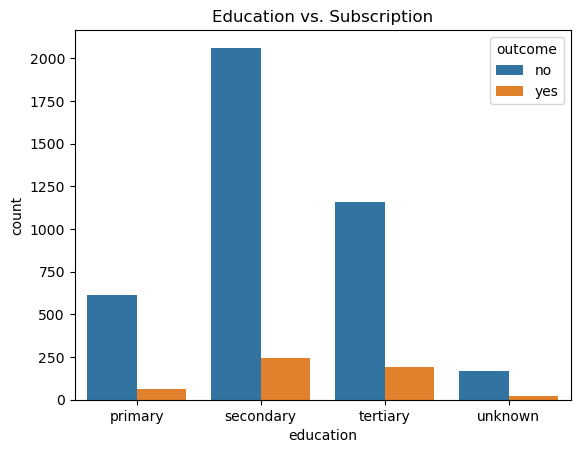

In [35]:
# Plotting the impact of education
sns.countplot(x='education', hue='outcome', data=df)
plt.title('Education vs. Subscription')
plt.show()

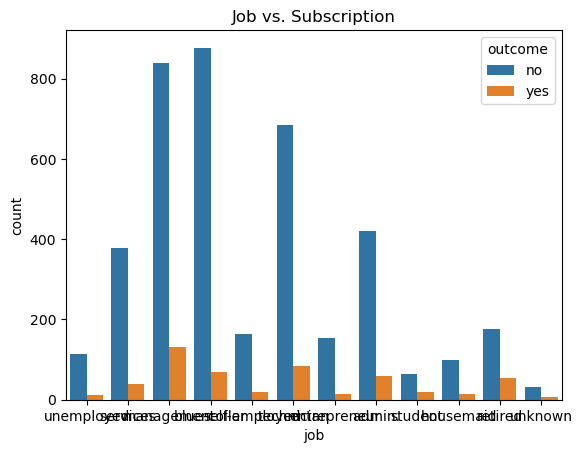

In [36]:
# Plotting the impact of job
sns.countplot(x='job', hue='outcome', data=df)
plt.title('Job vs. Subscription')
plt.show()


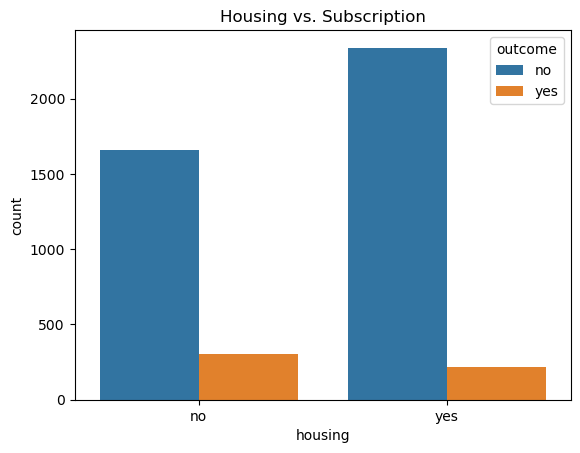

In [37]:
# Plotting the impact of housing
sns.countplot(x='housing', hue='outcome', data=df)
plt.title('Housing vs. Subscription')
plt.show()

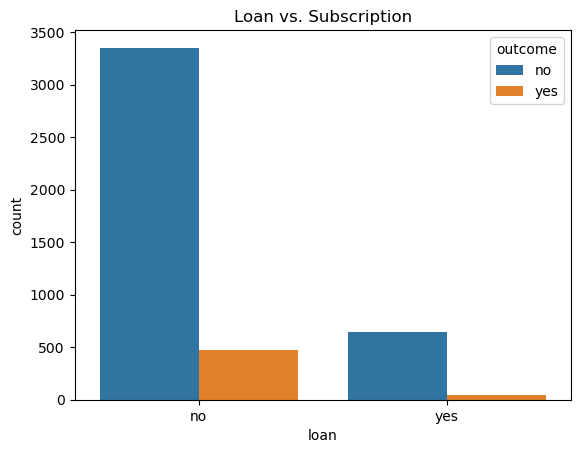

In [38]:
# Plotting the impact of loan
sns.countplot(x='loan', hue='outcome', data=df)
plt.title('Loan vs. Subscription')
plt.show()

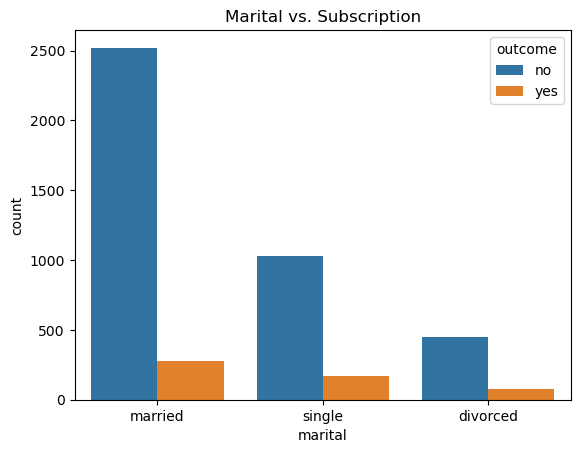

In [39]:
# Plotting the impact of marital
sns.countplot(x='marital', hue='outcome', data=df)
plt.title('Marital vs. Subscription')
plt.show()

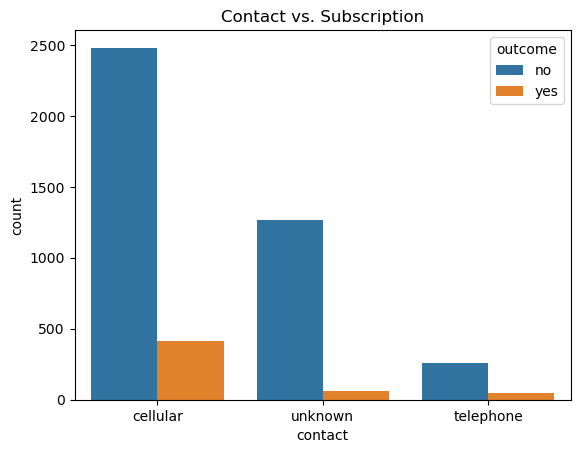

In [40]:
# Plotting the impact of contact
sns.countplot(x='contact', hue='outcome', data=df)
plt.title('Contact vs. Subscription')
plt.show()

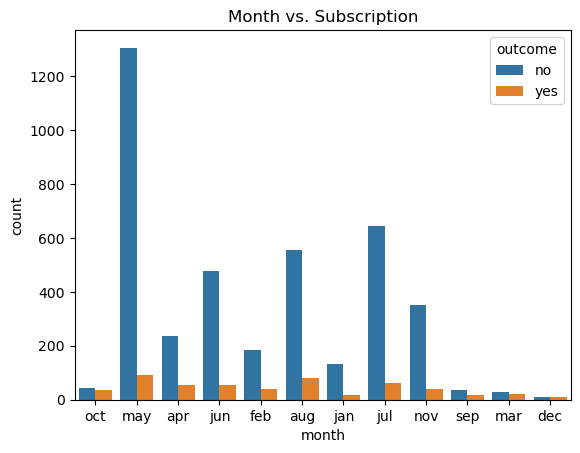

In [41]:
# Plotting the impact of month
sns.countplot(x='month', hue='outcome', data=df)
plt.title('Month vs. Subscription')
plt.show()

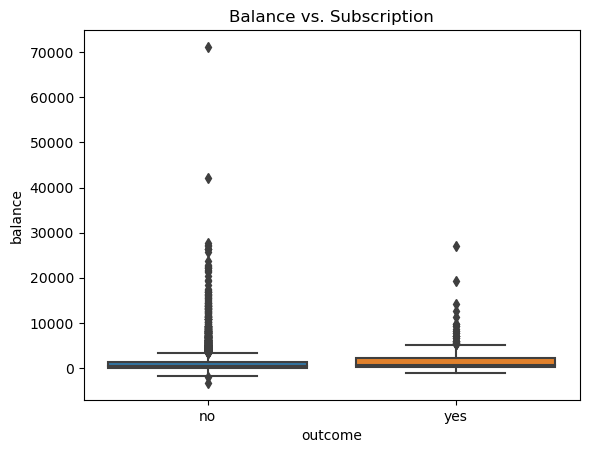

In [42]:
# Plotting the effect of duration on subscription
sns.boxplot(x='outcome', y='balance', data=df)
plt.title('Balance vs. Subscription')
plt.show()

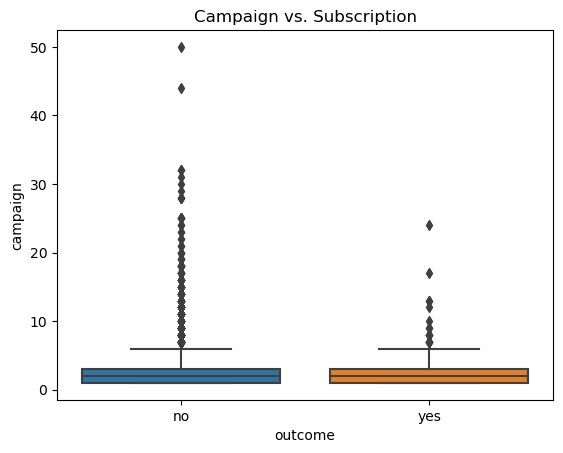

In [43]:
# Plotting the effect of campaign on subscription
sns.boxplot(x='outcome', y='campaign', data=df)
plt.title('Campaign vs. Subscription')
plt.show()

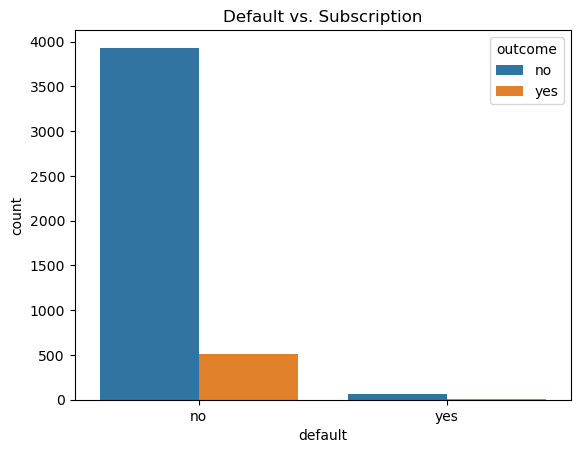

In [44]:
# Plotting the impact of default
sns.countplot(x='default', hue='outcome', data=df)
plt.title('Default vs. Subscription')
plt.show()

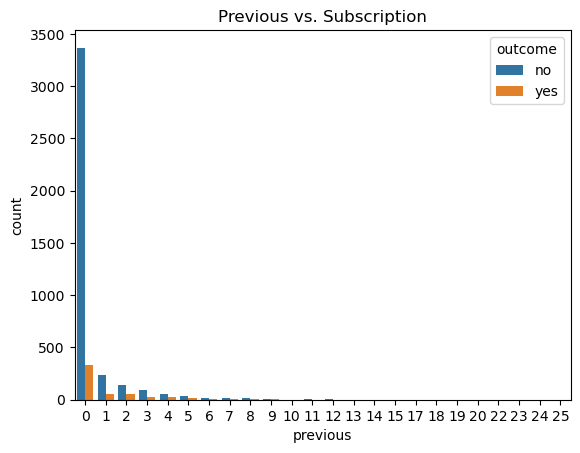

In [45]:
# Plotting the impact of previous
sns.countplot(x='previous', hue='outcome', data=df)
plt.title('Previous vs. Subscription')
plt.show()

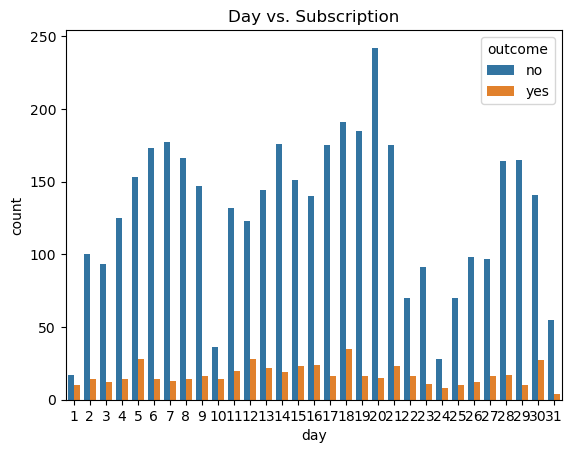

In [46]:
# Plotting the impact of day
sns.countplot(x='day', hue='outcome', data=df)
plt.title('Day vs. Subscription')
plt.show()

#### **Step 9: Answering Specific Research Questions** 

>  Your answer...

1. Can we predict whether a client will subscribe to a term deposit?
The model's accuracy, classification report, and feature importance can help determine if the model is effective at predicting the outcome.

2. How do contact attributes and previous outcomes affect the probability of subscription?
You can plot the relationships between features like duration, contact, poutcome, and the target variable (y) to visualize these effects.

3. Identifying high-risk or high-opportunity customer segments:
Use segmentation techniques like clustering or decision trees to identify customer segments that are more likely to subscribe.

3. How to  identifies the most important features contributing to the model's decisions?

    To identify the most important features contributing to a model's decisions, particularly with tree-based models like Random Forest, Decision Tree, or Gradient Boosting, you can use the model's built-in feature importance scores. These scores indicate the significance of each feature in making predictions. Here’s how this works and how you can extract these insights in Python:

    How Feature Importance is Calculated:
    a. For tree-based models, feature importance is determined based on how much each feature contributes to reducing impurity (e.g., Gini impurity or entropy) in the decision trees. The more a feature helps to improve the decision split in the tree, the higher its importance.
    b. Random Forests and Gradient Boosting calculate feature importance as the average importance score over all trees in the ensemble.


    Steps to Identify Important Features:

    1. Train a tree-based model (e.g., Random Forest, Decision Tree, Gradient Boosting).
    2. Extract feature importance scores from the trained model.
    3. Sort the features based on their importance scores to determine which features contribute the most to the model's
       decisions.
    4. Visualize the feature importance using bar plots for better understanding.

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'outcome_yes'],
      dtype='object')
Top Important Features:
    Feature  Importance
3  duration    0.261546
1   balance    0.097691
0       age    0.094023
2       day    0.084283
4  campaign    0.044472


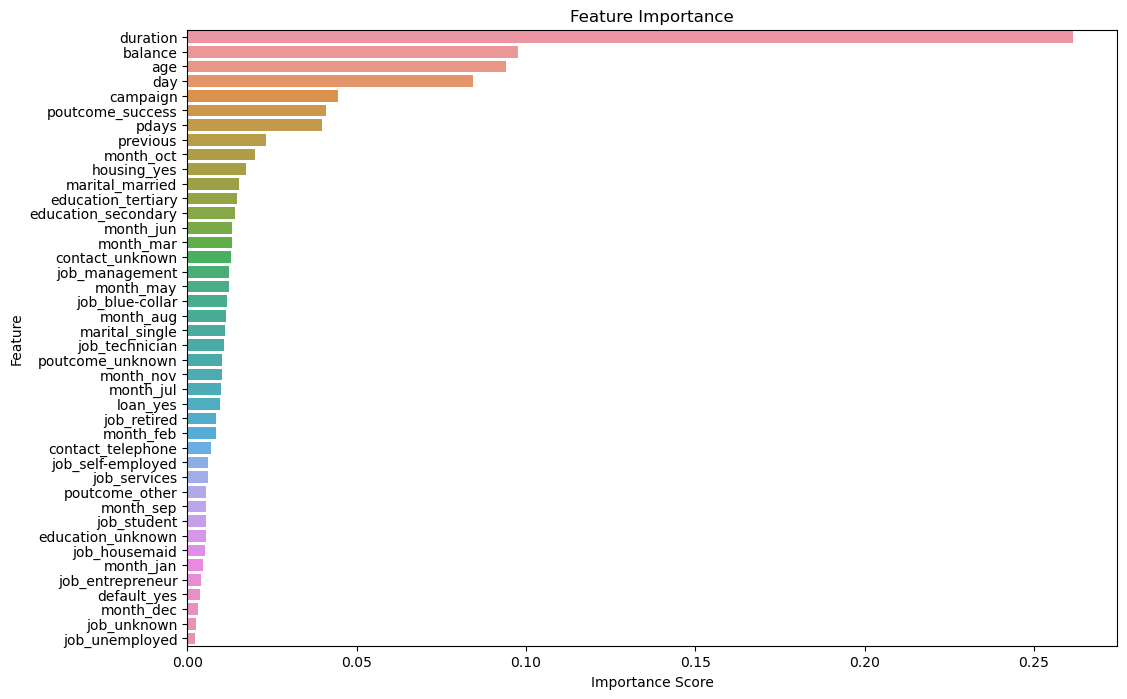

In [57]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Tina Lin\\Training\\DSI\\Projects\\Datasets\\bank.csv')

# Encode categorical features using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

print(df.columns)

# Separate features and target
X = df_encoded.drop('outcome', axis=1)
y = df_encoded['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Top Important Features:")
print(importance_df.head())

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

